# Nobel Prizes Dataset

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
nobel = pd.read_csv("nobel_data.csv")

# Preview the top 5 rows of the dataset
display(nobel.head())
print('-' * 75)

# Summarize column information
display(nobel.info())
print('-' * 75)

# Generate descriptive statistics
display(nobel.describe())
print('-' * 75)

# Identify missing values per column
display(nobel.isnull().sum())

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    object
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          95

None

---------------------------------------------------------------------------


,awardYear,sortOrder,prizeAmount,prizeAmountAdjusted,id
count,950.000000,950.000000,9.500000e+02,9.500000e+02,950.000000
mean,1971.207368,1.483158,3.460596e+06,6.145681e+06,483.043158
std,33.586969,0.688021,4.014530e+06,3.276874e+06,282.644711
min,1901.000000,1.000000,1.149350e+05,2.377268e+06,1.000000
25%,1947.000000,1.000000,1.703320e+05,3.052326e+06,238.250000
50%,1977.000000,1.000000,7.000000e+05,4.997406e+06,477.500000
75%,2000.000000,2.000000,8.000000e+06,9.044276e+06,727.750000
max,2019.000000,3.000000,1.000000e+07,1.229508e+07,984.000000


---------------------------------------------------------------------------


awardYear                       0
category                        0
categoryFullName                0
sortOrder                       0
portion                         0
prizeAmount                     0
prizeAmountAdjusted             0
dateAwarded                   417
prizeStatus                     0
motivation                      0
categoryTopMotivation         930
award_link                      0
id                              0
name                            0
knownName                      27
givenName                      27
familyName                     29
fullName                       27
penName                       939
gender                         27
laureate_link                   0
birth_date                     27
birth_city                     28
birth_cityNow                  28
birth_continent                27
birth_country                  27
birth_countryNow               27
birth_locationString           27
death_date                    320
death_city    

#### The annual proportion of US laureates was calculated.
#### A regression plot was created with "awardYear" on the x-axis and the proportion of US winners on the y-axis to show trends over time.

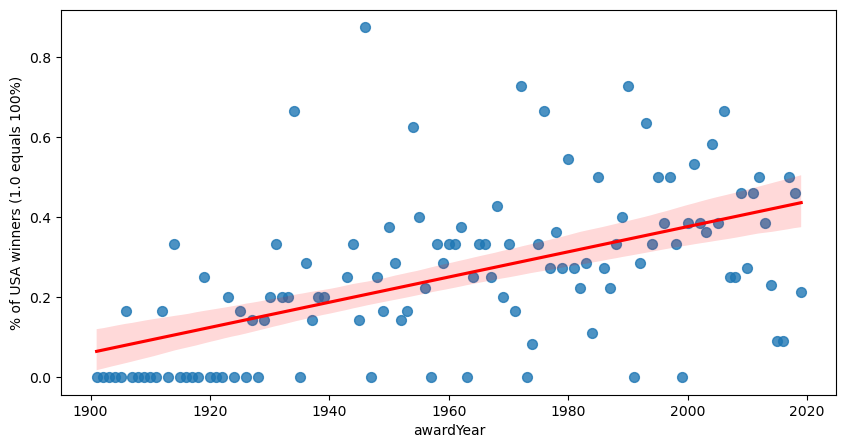

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a column to identify laureates hailing from the USA
nobel["born_in_USA"] = nobel["birth_country"] == "USA"

# Determine the annual proportion of US laureates
prop_usa_winners = nobel.groupby("awardYear", as_index=False)["born_in_USA"].mean()

# Create a regression plot
plt.figure(figsize=(10, 5))
sns.regplot(data=prop_usa_winners, x="awardYear", y="born_in_USA", scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.ylabel("% of USA winners (1.0 equals 100%)")
plt.show()

# The Largest Number of Nobel Prizes

 This section identifies the country with the highest number of Nobel Prizes by tallying laureates based on their "birth_country." 
 The analysis focuses on the top 10 countries with the most laureates.
 A bar chart is plotted with country names on the x-axis and the  number of Nobel Prize per country on the y-axis.

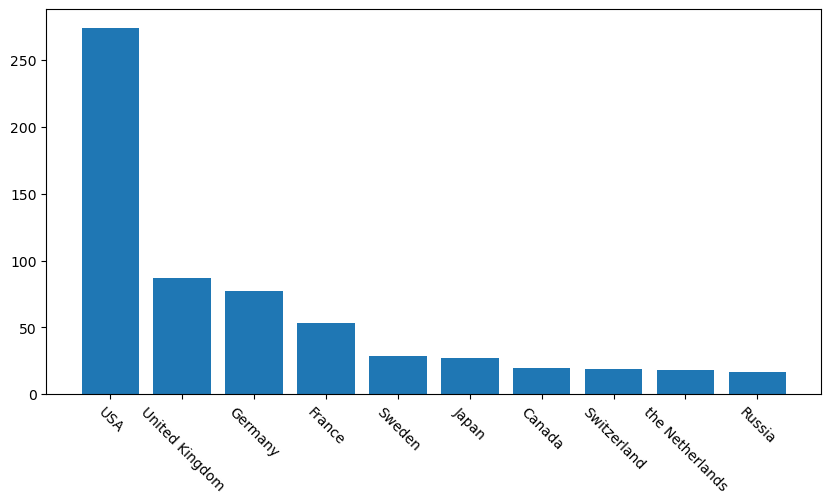

In [8]:
# Extract the number of Nobel Prizes per country (y) and country names (x)
y = nobel["birth_country"].value_counts().head(10)
x = y.index

# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.xticks(rotation=-45)
plt.show()

# Most Commonly Represented Sex

 The analysis focuses on gender distribution across Nobel Prize categories to determine the predominant gender in each field. 
 A new column is added to the nobel DataFrame to identify female laureates. 
 The decade of each award is calculated, and the proportion of female winners is computed for each decade and category. 
 These proportions are then visualized by category over time.

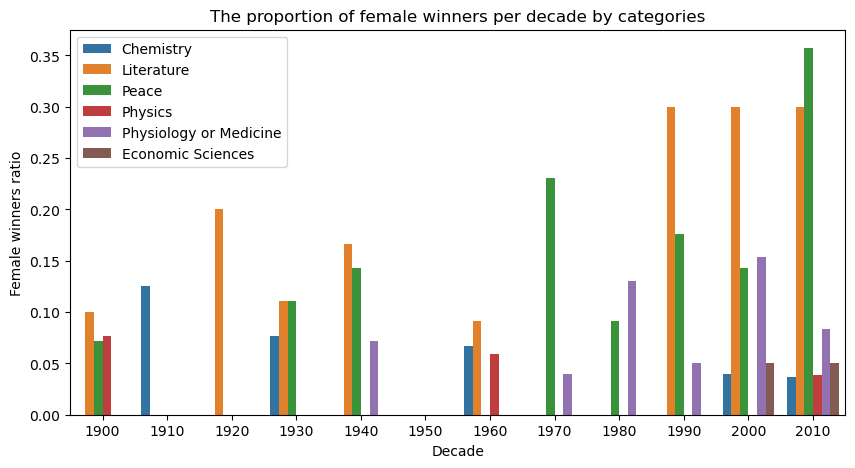

In [9]:
# Create a new column to identify if the laureate is female
nobel["female_winner"] = nobel["gender"] == "female"

# Calculate the decade for each Nobel Prize award
nobel["decade"] = nobel["awardYear"] // 10 * 10

# Compute the proportion of female winners for each decade and category
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Plot the proportion of female winners per decade by categories
plt.figure(figsize=(10, 5))
sns.barplot(x="decade", y="female_winner", hue="category", data=prop_female_winners)
plt.title("The proportion of female winners per decade by categories")
plt.ylabel("Female winners ratio")
plt.xlabel("Decade")
plt.legend(loc="upper left")
plt.show()

# Motivation Analysis


This section examines the text to identify the most prevalent words in the dataset. 
Stopwords are removed from the "motivation" column, and the data is modified accordingly. 

For example, the sentence "I like reading, so I read" is transformed into "Like Reading Read."  
The resulting words are visualized in a word cloud, with word size indicating frequency.


 The process involves applying a lambda function to remove stopwords from the "motivation" column, storing the processed text in the "Filtered motivation" column, concatenating all entries into a single text string, splitting the text into individual words, and creating a pandas DataFrame to calculate word frequencies. 

 The 20 most common words are visualized using a seaborn barplot.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


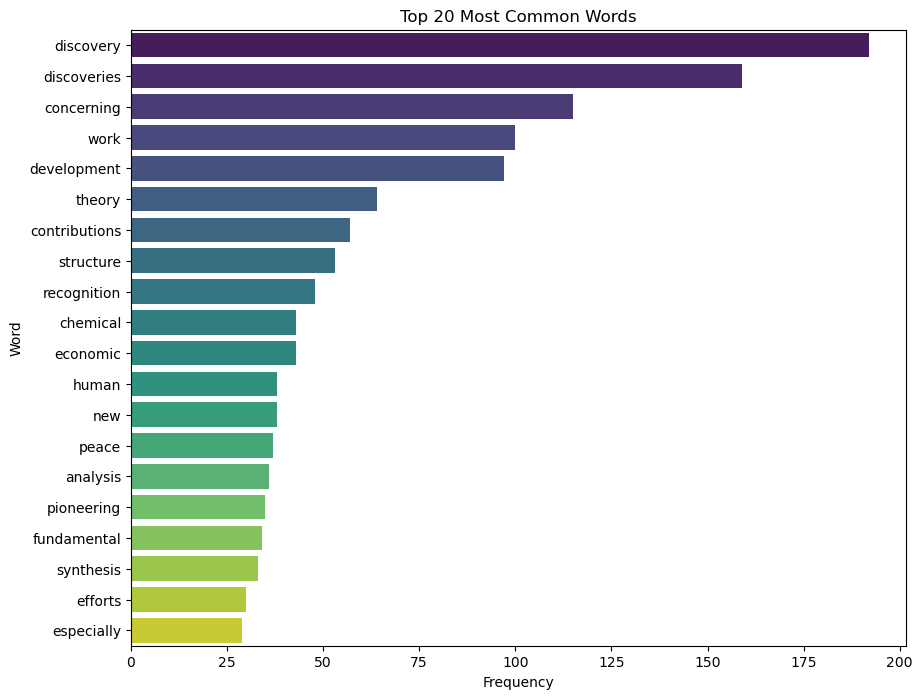

In [10]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the 'Filtered motivation' column with empty strings
nobel["Filtered motivation"] = ""

# Apply a lambda function to remove stopwords from the 'motivation' column and store the result in 'Filtered motivation'
nobel["Filtered motivation"] = nobel["motivation"].apply(
    lambda x: " ".join(word for word in x.split() if word.lower() not in stopwords.words("english"))
)

# Concatenate all entries in 'Filtered motivation' to form a single text string
text = " ".join(nobel["Filtered motivation"])

# Split the text into words and create a pandas DataFrame from the list of words
words_df = pd.DataFrame(text.split(), columns=['word'])

# Calculate word frequency
word_freq = words_df['word'].value_counts().reset_index()
word_freq.columns = ['word', 'freq']

# Plotting the 20 most common words using seaborn's barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='freq', y='word', data=word_freq.head(20), palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Extra Statistics

Key statistics about Nobel laureates are derived as follows:

The earliest female Nobel Prize recipient is identified based on the "awardYear," as is the earliest male laureate. 
Additionally, the laureate awarded the largest Nobel Prize amount is determined.

In [12]:
print('The earliest female Nobel Prize recipient:')
display(nobel[nobel["gender"] == "female"].nsmallest(1, columns="awardYear"))

print('\nThe earliest male Nobel Prize recipient:')
display(nobel[nobel["gender"] == "male"].nsmallest(1, columns="awardYear"))

print('\nLaureate awarded the largest Nobel Prize amount:')
display(nobel.iloc[nobel[["prizeAmount"]].idxmax()])

The earliest female Nobel Prize recipient:


,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4,born_in_USA,female_winner,decade,Filtered motivation
566,1903,Physics,The Nobel Prize in Physics,3,1/4,141358,7795478,NaN,received,in recognition of the extraordinary services t...,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,1900,recognition extraordinary services rendered jo...



The earliest male Nobel Prize recipient:


,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4,born_in_USA,female_winner,decade,Filtered motivation
211,1901,Physiology or Medicine,The Nobel Prize in Physiology or Medicine,1,1,150782,8567159,NaN,received,"for his work on serum therapy, especially its ...",...,NaN,NaN,"Marburg University, Marburg, Germany",NaN,NaN,NaN,False,False,1900,"work serum therapy, especially application dip..."



Laureate awarded the largest Nobel Prize amount:


,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4,born_in_USA,female_winner,decade,Filtered motivation
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN,True,False,2000,analyses markets asymmetric information
